# Install mat73 to load MATLAB Dataset file

In [ ]:
pip install mat73

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing required libraries

In [ ]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf;
from tensorflow.keras import layers;
from tensorflow.keras import Model,Sequential;
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization

In [ ]:
%matplotlib tk

ImportError: ignored

# Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=mat73.loadmat('/content/drive/MyDrive/holo_dataset_256_73.mat')

# Returns the dictionary for the dataset (variables present in the dataset)

In [ ]:
data.keys()

dict_keys(['holo', 'lambda', 'nm', 'np', 'pix_size', 'r', 'x_data', 'y_data', 'z_data'])

# Creating memory for storing the images in 'X_train' and coordinates in 'Y_train'

In [ ]:
l=4000
X_train = np.zeros(shape=[l,256, 256,1])
Y_train = np.zeros(shape = [l,2])

In [ ]:
k=range(0,4000)

In [ ]:
for i in k:
    X_train[i,:,:,0]=(data['holo'][:,:,i])
    Y_train[i,0],Y_train[i,1]=data['x_data'][i],data['y_data'][i]

# Checking if the images are stored correctly

In [ ]:

print(X_train[43,:,:,0])

[[1.00012698 1.00028143 1.00019614 ... 0.99998386 1.0001945  0.99972709]
 [1.00017283 0.99991247 0.99972864 ... 0.9997558  1.00009893 1.00009358]
 [0.99972162 0.99979259 1.00003877 ... 1.00020925 0.99972611 1.00020117]
 ...
 [0.99987115 1.00014661 1.00029322 ... 1.00014007 0.99973381 1.00026518]
 [0.99971909 0.9997704  1.00001919 ... 0.99978432 1.00004454 1.00014493]
 [1.00004669 0.99978613 0.9997122  ... 0.99978321 1.0002824  0.99978622]]


In [ ]:
print(Y_train[:5,:])

[[174.00726588 212.44570421]
 [133.04810498  88.80610742]
 [180.25431511 184.68052833]
 [ 91.44686185  92.42060195]
 [201.5524357   93.91829006]]


# Check if GPU is allocated

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Initializing and creating the model

In [ ]:
model=Sequential()
img_input = layers.Input(shape=(256, 256,1))
model.add(layers.Conv2D(16, 3, activation='relu', strides = 1, padding = 'same',input_shape=(256,256,1)))
model.add(BatchNormalization(axis=-1))
model.add(layers.MaxPool2D(pool_size=2))
model.add(layers.Conv2D(32, 3, activation='relu', strides = 2))
model.add(layers.MaxPool2D(pool_size=2))
model.add(BatchNormalization(axis=-1))
model.add(layers.Conv2D(16, 3, activation='swish', strides = 2))
model.add(layers.MaxPool2D(pool_size=2))
model.add(BatchNormalization(axis=-1))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='swish'))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.build(img_input)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                        

# Compiling the model

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse']);

# EarlyStopping Callback to stop at a certain epoch

In [ ]:
callback = EarlyStopping(monitor='loss',patience=5)

# Fitting/Training the model designed

In [ ]:
training=model.fit(X_train,Y_train, epochs = 50,verbose=1,batch_size=16,validation_split=0.2,callbacks=[callback])

Epoch 1/50
200/200 [==============================] - 16s 22ms/step - loss: 7868.2236 - mse: 7868.2236 - val_loss: 6494.9146 - val_mse: 6494.9146
Epoch 2/50
200/200 [==============================] - 3s 17ms/step - loss: 151.1113 - mse: 151.1113 - val_loss: 22045.8477 - val_mse: 22045.8477
Epoch 3/50
200/200 [==============================] - 3s 17ms/step - loss: 73.4912 - mse: 73.4912 - val_loss: 20288.6367 - val_mse: 20288.6367
Epoch 4/50
200/200 [==============================] - 3s 17ms/step - loss: 53.5621 - mse: 53.5621 - val_loss: 18270.2949 - val_mse: 18270.2949
Epoch 5/50
200/200 [==============================] - 3s 17ms/step - loss: 36.1686 - mse: 36.1686 - val_loss: 22000.1855 - val_mse: 22000.1855
Epoch 6/50
200/200 [==============================] - 3s 17ms/step - loss: 27.4278 - mse: 27.4278 - val_loss: 19164.7734 - val_mse: 19164.7734
Epoch 7/50
200/200 [==============================] - 3s 17ms/step - loss: 21.5212 - mse: 21.5212 - val_loss: 2712.9419 - val_mse: 2712.9

In [ ]:

model.predict(data['holo'][:,:,5080].reshape(1,256,256,1))


array([[ 0.      , 24.780722]], dtype=float32)

In [ ]:
data['x_data'][5001]

In [ ]:
data['y_data'][5080]

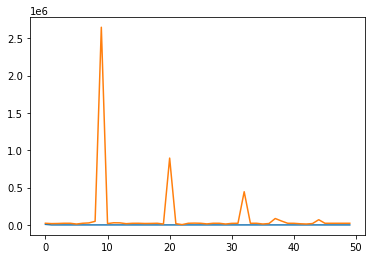

In [ ]:
history = training.history

plt.plot(history['loss'])

plt.plot(history['val_loss'])

plt.show()

In [ ]:
model.save('C:/Users/gmans/mynn')

In [ ]:
import os;
print(os.getcwd())

In [ ]:
new_model = tf.keras.models.load_model('C:/Users/gmans/mynn')

In [ ]:
new_model.summary()

In [ ]:
new_model.predict(data['holo'][:,:,5000].reshape(1,256,256,1))

In [ ]:
model.save_weights("weights.h5")

In [ ]:
new_model.load_weights('weights.h5')

In [ ]:
model.history.history